In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
# sns.set()
# sns.set_style("white")
# sns.set_palette("GnBu_d")
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
from pathlib import Path

import geopy
from geopy.geocoders import GoogleV3
from geopy.distance import geodesic

In [2]:
read_once_df = pd.read_csv("../boston_2016_prep_cluster.csv")

In [3]:
df = read_once_df
df["start_time"] = pd.to_datetime(df["start_time"],format="%Y-%m-%d %H:%M:%S") # FORMAT %Y-%m-%d %H:%M:%S beachte - und :
df["end_time"] = pd.to_datetime(df["end_time"],format="%Y-%m-%d %H:%M:%S")

In [4]:
df['user_type'] = df['user_type'].replace(['Customer','Subscriber'],[0,1])
# user_type:
# 0 = Customer
# 1 = Subscriber

In [5]:
df['weekday_start'] = df['weekday_start'].replace([0,1,2,3,4,5,6],[0,0,0,0,0,1,1])
df['weekday_end'] = df['weekday_end'].replace([0,1,2,3,4,5,6],[0,0,0,0,0,1,1])
# 0 -> workday
# 1 -> weekend 

In [6]:
len(df)

1233600

In [7]:
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

616800

In [8]:
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

308400

In [9]:
df.drop(['level_0'], axis=1, inplace=True)
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

154200

In [10]:
df.drop(['level_0'], axis=1, inplace=True)
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

77100

In [11]:
df.drop(['level_0'], axis=1, inplace=True)
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

38550

In [12]:
df.drop(['level_0'], axis=1, inplace=True)
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

19275

In [13]:
df.drop(['level_0'], axis=1, inplace=True)
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

9637

In [14]:
df.head(0)

Empty DataFrame
Columns: [level_0, index, Unnamed: 0, start_time, end_time, start_station_id, end_station_id, start_station_name, end_station_name, bike_id, user_type, start_coordinates, end_coordinates, Distance (KM), Duration (Seconds), Speed (km/h), start_hour, start_distance_center, end_distance_center, weekday_start, weekday_end]
Index: []

[0 rows x 21 columns]

In [15]:
df.drop(['index','level_0','Unnamed: 0','start_time','end_time','start_station_id','end_station_id','start_station_name','end_station_name','bike_id','start_coordinates','end_coordinates','weekday_end'], axis=1, inplace=True)

In [16]:
df.drop(['Duration (Seconds)','Speed (km/h)'], axis=1, inplace=True)

In [ ]:
df.drop('start_hour', axis=1, inplace=True)

In [17]:
df.drop("user_type", axis=1, inplace=True)

In [18]:
df.drop('weekday_start', axis=1, inplace=True) 

In [19]:
df.head(5)

Distance (KM)  Duration (Seconds)  Speed (km/h)  start_hour  \
0       2.193164               951.0      8.302200          15   
1       1.713520               635.0      9.714443           8   
2       2.203710               782.0     10.144955          17   
3       1.497483               305.0     17.675211          11   
4       2.201538               609.0     13.014019          17   

   start_distance_center  end_distance_center  
0               4.617206             2.500986  
1               1.441903             2.500986  
2               1.688254             3.751808  
3               3.310986             1.905842  
4               6.867309             4.944220

X -> df bei workshop

In [20]:
X = df

In [21]:
# X = df.drop("user_type", axis=1)
# y = df["user_type"]
# X.head()

In [22]:
# y.head()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# create a df out of array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

Distance (KM)  Duration (Seconds)  Speed (km/h)  start_hour  \
0       0.276486            0.052305     -0.297859    0.254831   
1      -0.115283           -0.219245      0.069059   -1.216215   
2       0.285100           -0.092923      0.180911    0.675130   
3      -0.291739           -0.502826      2.137362   -0.585767   
4       0.283326           -0.241588      0.926328    0.675130   

   start_distance_center  end_distance_center  
0               0.878449            -0.308013  
1              -0.905351            -0.308013  
2              -0.766958             0.392627  
3               0.144649            -0.641379  
4               2.142497             1.060548

In [24]:
df_scaled = X_scaled_df
# df_scaled["user_type"] = df["user_type"]

In [25]:
# sns.pairplot(data=df_scaled, hue="user_type")

In [26]:
from sklearn.cluster import KMeans

In [27]:
k_max = 50  # We have 147 datapoints, more than 50 clusters are definitely not reasonable!

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

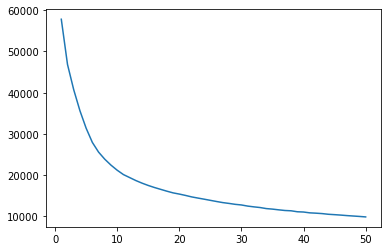

In [28]:
plt.plot(clusters, losses)
plt.show()

(0.0, 20.0)

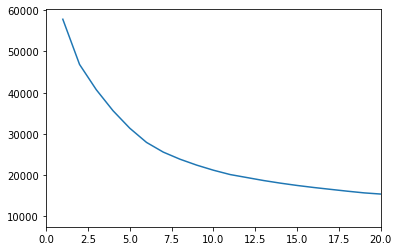

In [29]:
plt.plot(clusters, losses)
plt.xlim([0,20])

In [30]:
numbers = ["zero", "one", "two", "three","four","five","six"]

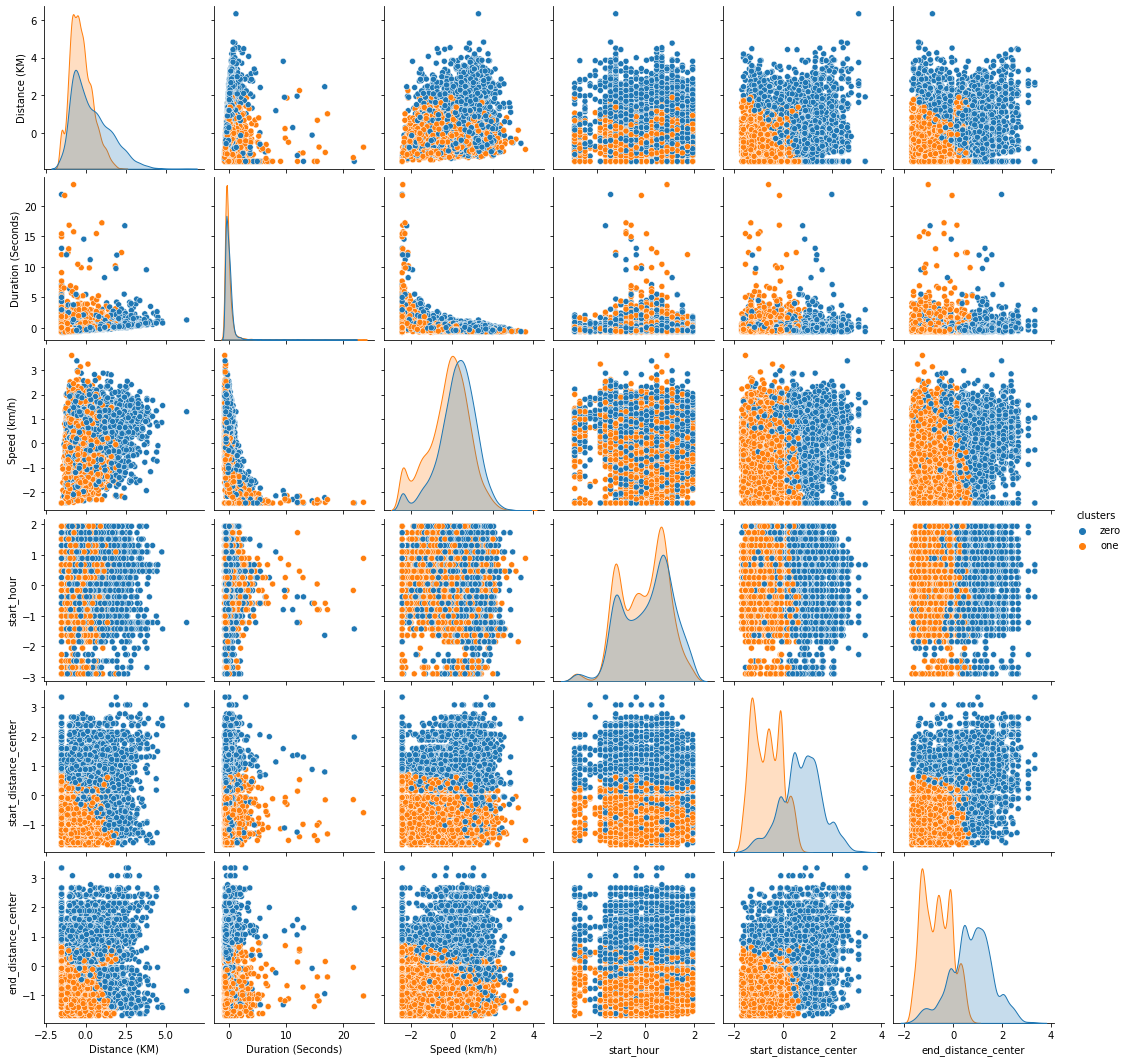

In [31]:
# refit algorithm
two_means = KMeans(n_clusters=2)
two_means.fit(X_scaled)

# match records to clusters by calling predict
# two_means.predict(X_scaled)

df_scaled["clusters"] = two_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")

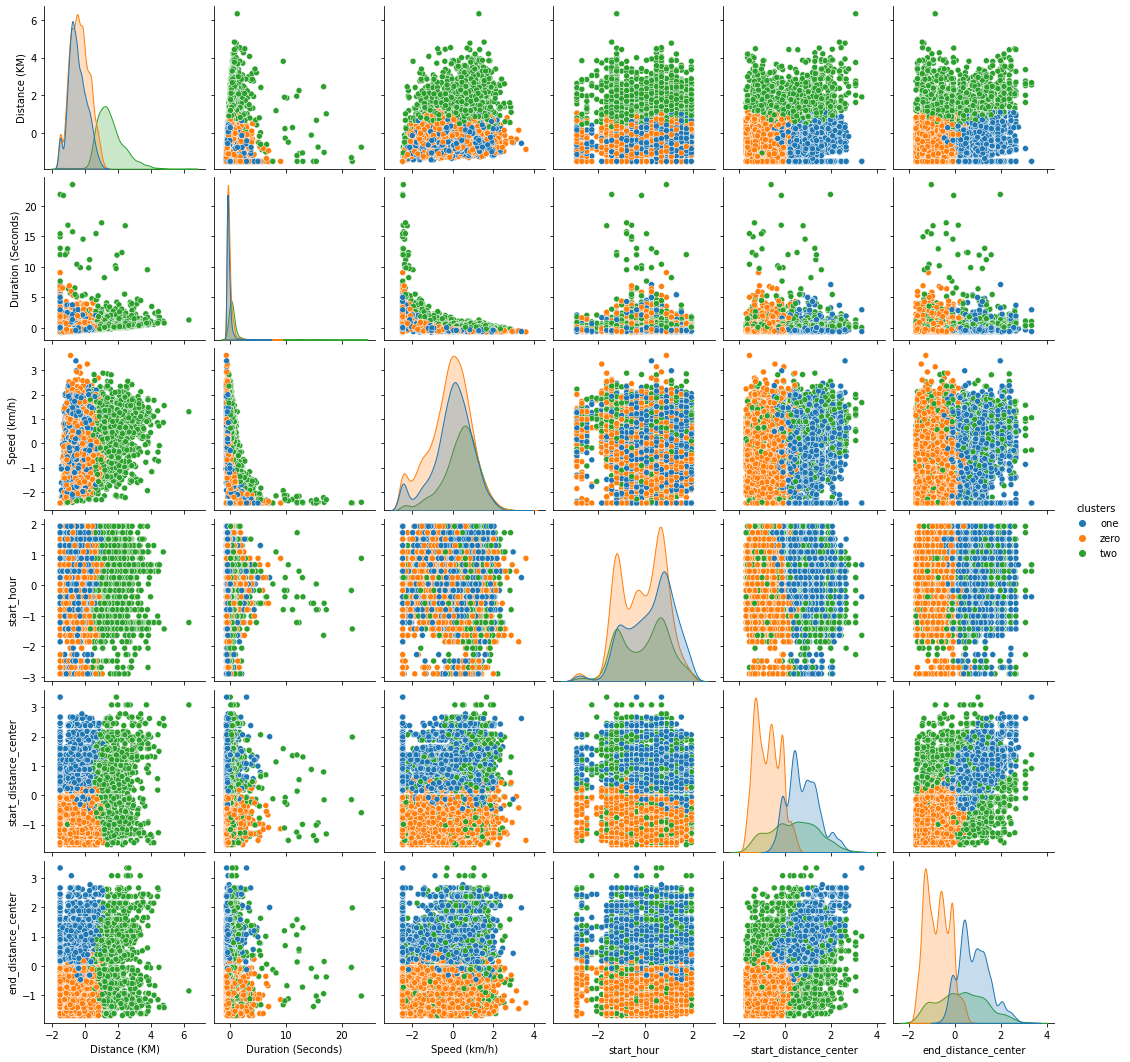

In [32]:
three_means = KMeans(n_clusters=3)
three_means.fit(X_scaled)
df_scaled["clusters"] = three_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")

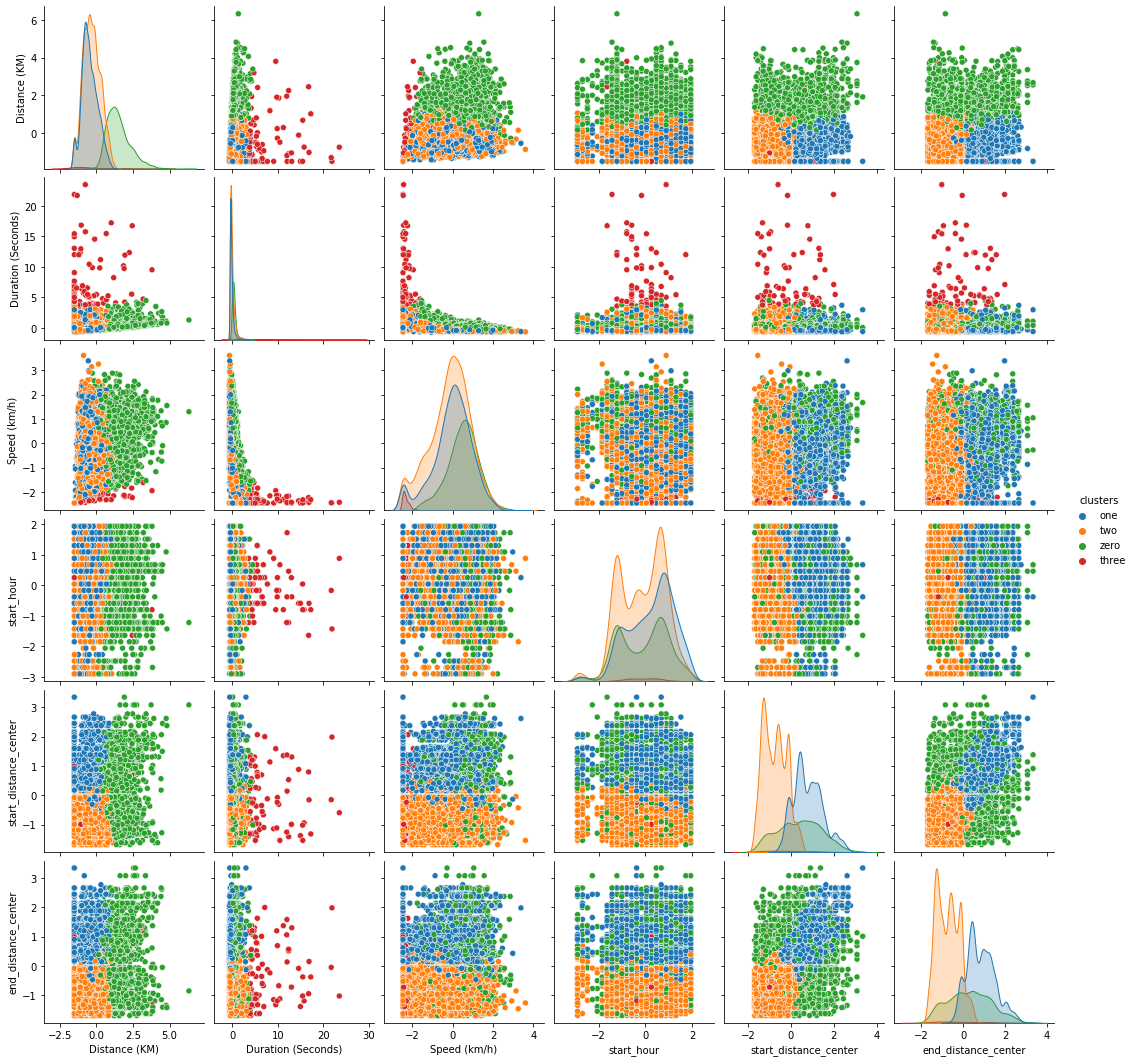

In [33]:
four_means = KMeans(n_clusters=4)
four_means.fit(X_scaled)
df_scaled["clusters"] = four_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")

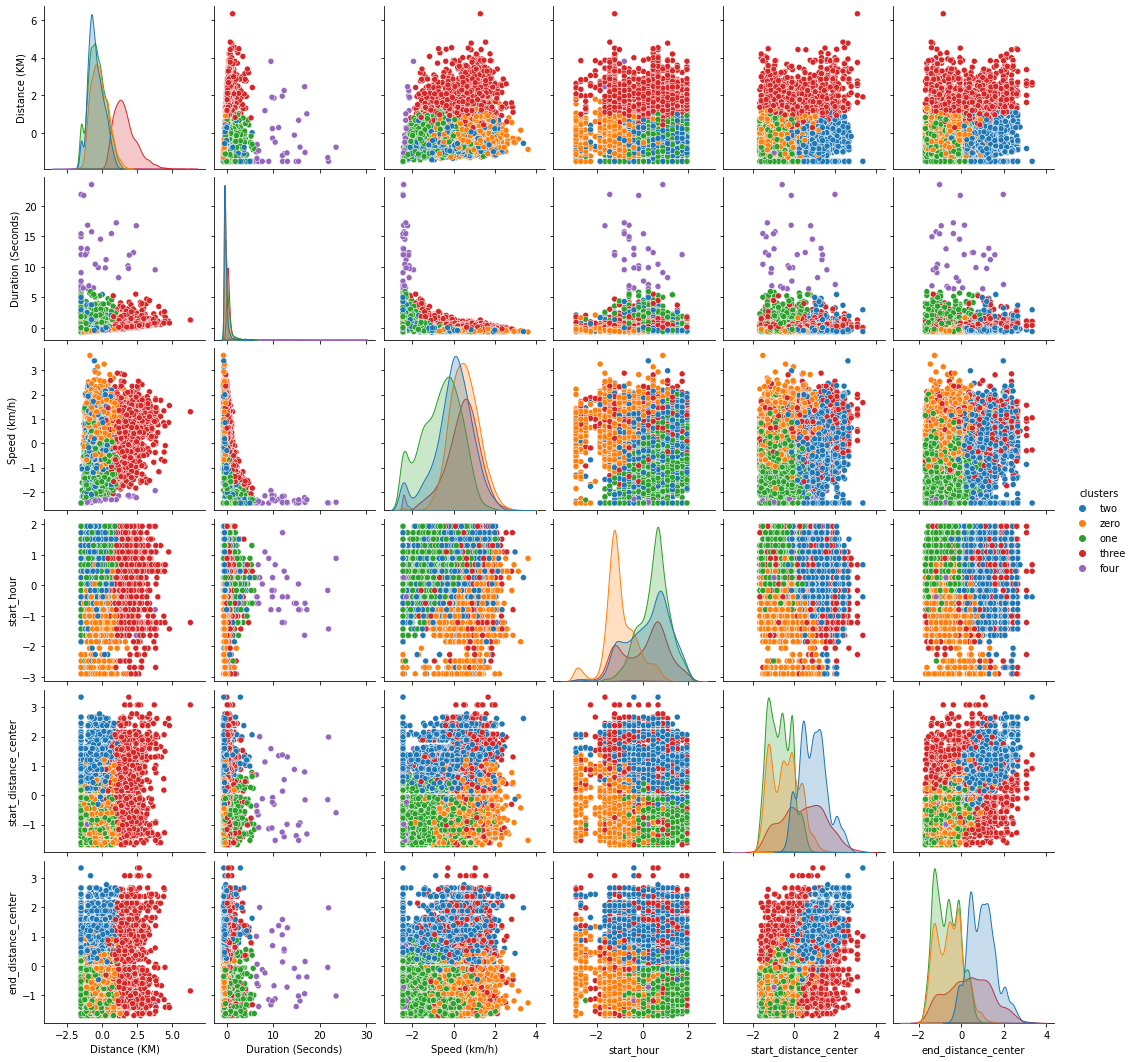

In [34]:
five_means = KMeans(n_clusters=5)
five_means.fit(X_scaled)
df_scaled["clusters"] = five_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")

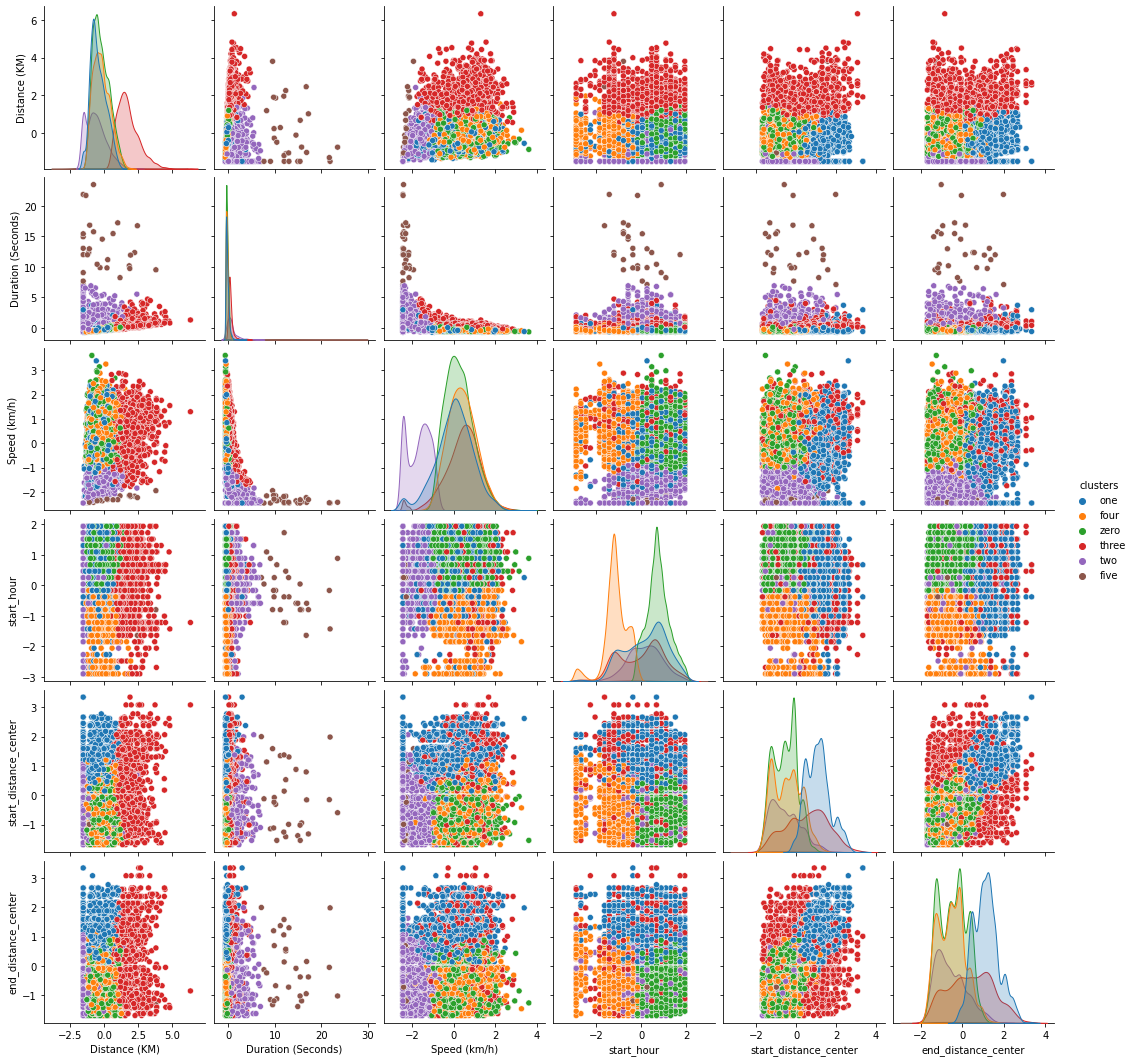

In [35]:
six_means = KMeans(n_clusters=6)
six_means.fit(X_scaled)
df_scaled["clusters"] = six_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")

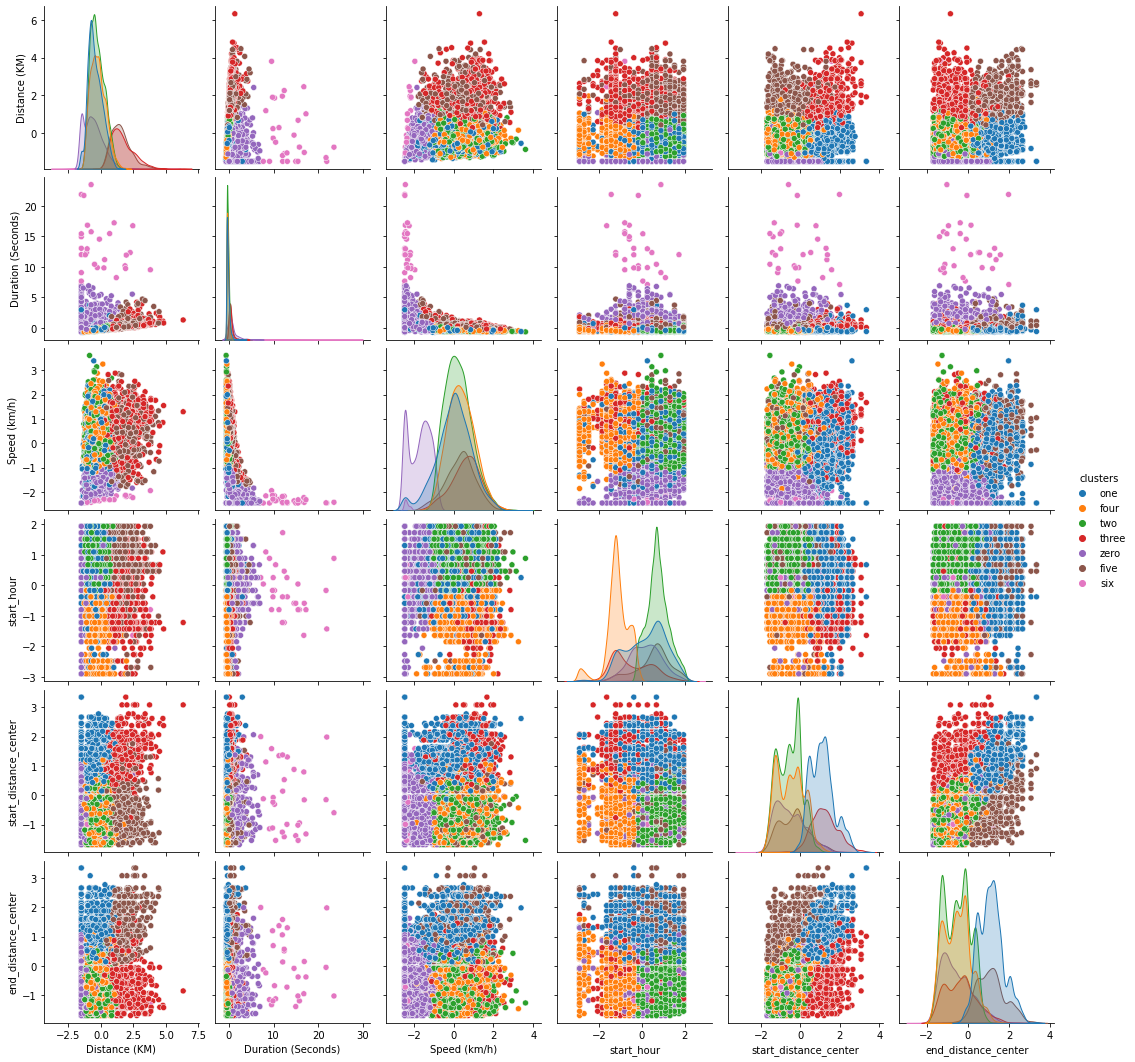

In [36]:
seven_means = KMeans(n_clusters=7)
seven_means.fit(X_scaled)
df_scaled["clusters"] = seven_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")